# Name: Noraiz Qureshi
# Roll No: 34
# ANN

# Artificial Neural Network-Based Iris Flower Classification Using Numerical Features

Training data shape: (120, 4)
Training labels shape: (120, 3)
Testing data shape: (30, 4)
Testing labels shape: (30, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 [==============================] - 2s 161ms/step - 

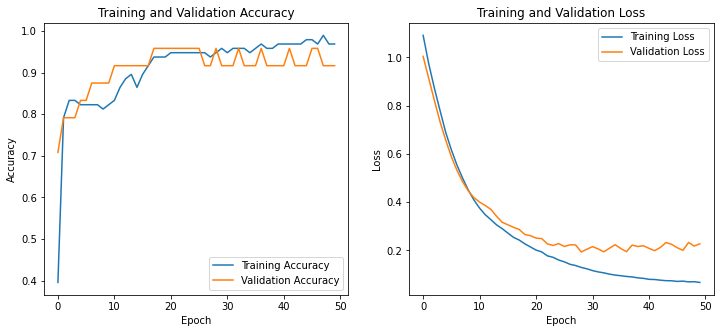

In [1]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Step 2: Load and Preprocess the Iris Dataset
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (0: setosa, 1: versicolor, 2: virginica)

# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print dataset shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

# Step 3: Build the ANN Model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),  # Input layer (4 features)
    layers.Dense(32, activation='relu'),                  # Hidden layer
    layers.Dense(16, activation='relu'),                  # Hidden layer
    layers.Dense(3, activation='softmax')                # Output layer (3 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Step 4: Train the Model
history = model.fit(X_train, y_train,
                    epochs=50,                # Number of epochs
                    batch_size=16,            # Batch size
                    validation_split=0.2,    # Use 20% of training data for validation
                    verbose=1)

# Step 5: Evaluate the Model
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 6: Plot Training and Validation Accuracy/Loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()